# SVR

16BCE1259

Shushil Kumar Ravishankar


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
import numpy as np
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data=pd.read_csv("oneyear.csv")

In [3]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-02-10T05:12:35.460Z,5.1033,125.3179,44.32,4.3,mb,NaN,131,1.970,0.70,...,2018-02-10T09:03:34.040Z,"36km SSW of Sarangani, Philippines",earthquake,5.0,9.3,0.126,18.0,reviewed,us,us
1,2018-02-10T00:31:19.880Z,-8.8535,117.1527,116.88,4.9,mb,NaN,59,2.991,1.06,...,2018-02-10T03:42:15.567Z,"32km SSW of Batudulang, Indonesia",earthquake,6.5,7.3,0.091,38.0,reviewed,us,us
2,2018-02-08T09:52:47.330Z,4.7512,96.2239,10.00,5.3,mww,NaN,148,0.862,1.29,...,2018-02-09T02:47:40.084Z,"51km S of Reuleuet, Indonesia",earthquake,6.6,1.8,0.073,18.0,reviewed,us,us
3,2018-02-07T22:28:37.900Z,-10.1202,118.7274,10.00,4.5,mb,NaN,86,3.764,0.95,...,2018-02-07T22:54:23.040Z,"61km SW of Panenggoede, Indonesia",earthquake,7.6,1.9,0.084,42.0,reviewed,us,us
4,2018-02-07T20:22:57.530Z,1.4361,127.0142,120.78,4.5,mb,NaN,105,0.748,0.76,...,2018-02-07T21:26:37.040Z,"82km NNW of Kota Ternate, Indonesia",earthquake,8.0,6.6,0.089,37.0,reviewed,us,us


In [4]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1369.000000,1369.000000,1369.000000,1369.000000,0.0,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1368.000000,1368.000000
mean,-1.117302,119.207969,102.069072,4.496275,NaN,100.971512,2.326909,0.852768,8.227684,6.678305,0.121450,30.986111
std,5.605702,10.028394,129.415379,0.377192,NaN,44.781584,2.286374,0.260124,2.622920,3.829167,0.050303,30.446167
min,-11.762200,95.113500,4.000000,3.900000,NaN,13.000000,0.008000,0.130000,2.400000,0.600000,0.034000,1.000000
25%,-7.026200,112.938000,24.610000,4.200000,NaN,71.000000,1.310000,0.670000,6.500000,3.600000,0.085000,13.000000
50%,0.268400,123.957300,53.860000,4.400000,NaN,95.000000,2.063000,0.830000,7.900000,7.000000,0.116000,20.000000
75%,3.541300,126.788100,121.110000,4.600000,NaN,128.000000,2.928000,1.030000,9.500000,8.900000,0.148000,37.000000
max,9.268100,128.317100,621.700000,6.900000,NaN,324.000000,56.265000,1.640000,29.300000,33.700000,0.532000,269.000000


In [5]:
data.dropna(how='all',axis=1,inplace=True)

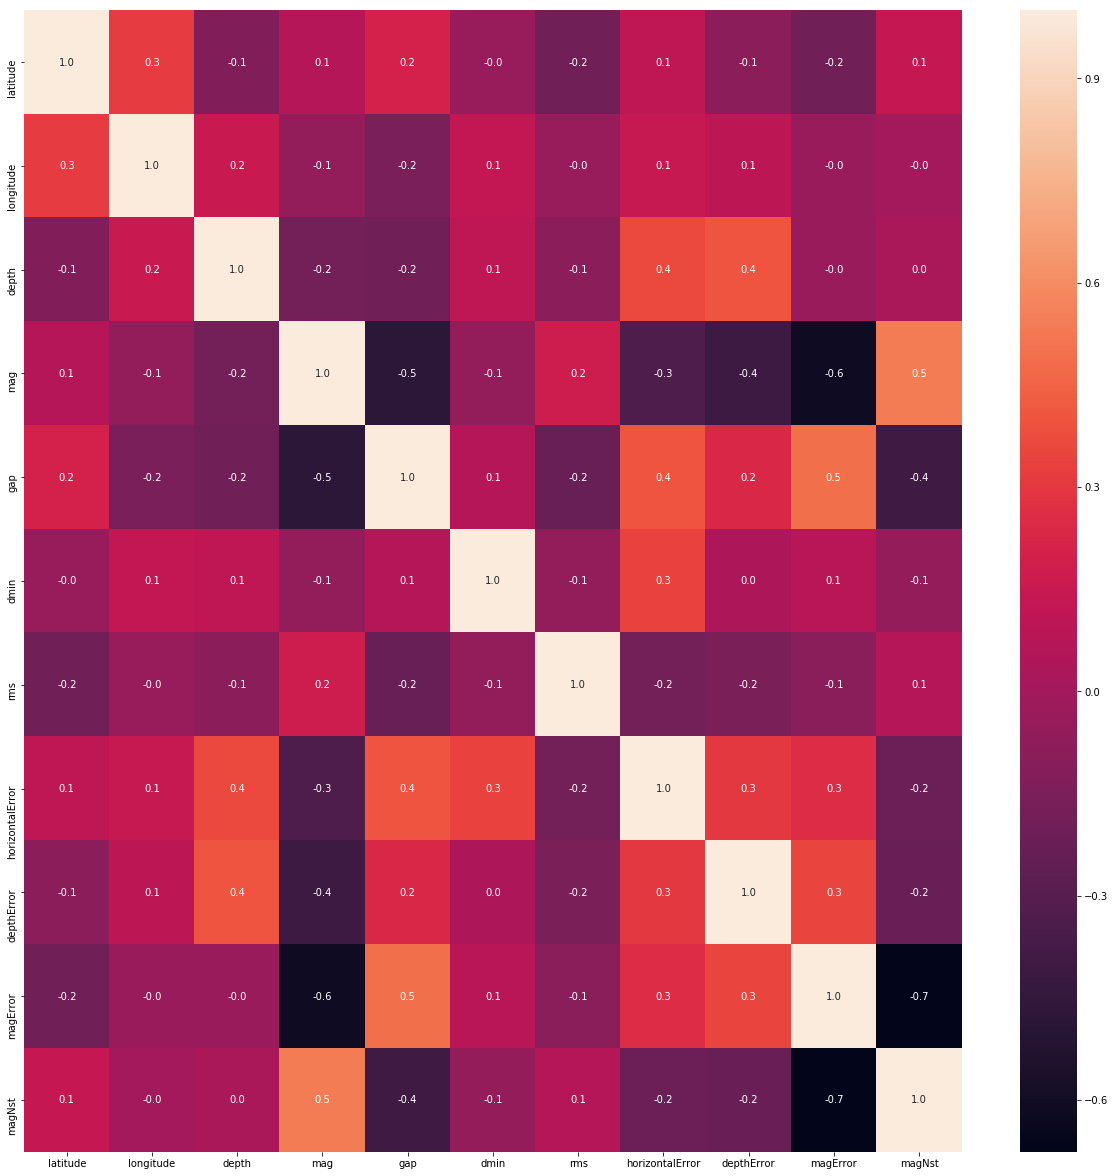

In [6]:
f= plt.subplots(figsize=(21,21))
sn.heatmap(data.corr(),annot=True,fmt='.1f',color='green')

In [7]:
#sn.pairplot(data)

In [8]:
X = data[['latitude','longitude']]
Y = [0 if elem<4.5 else 1 for elem in data.mag]

x_train,x_test,y_train,y_test= train_test_split(X, Y, test_size=0.3)

In [9]:
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'SVM Decision Region Boundary')

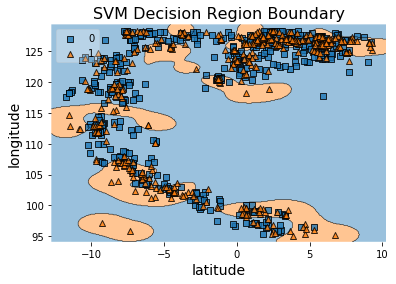

In [10]:
plot_decision_regions(X=np.array(x_train), 
                      y=np.array(y_train),
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

In [11]:
predict=clf.predict([[69,70],[4,96]])
print(predict)

[0 1]


In [12]:
predict=clf.predict(x_test)
print(accuracy_score(predict,y_test))

0.5644768856447688
